### Lets see what the hidden layers outputs look like for a simple NN solving the XOR problem



In [38]:
#Imports 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Lets make our mode:

In [39]:
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        h = self.relu(self.hidden(x))
        o = self.relu(self.output(h))
        return o, h #we also return the h so that we can then look at the hidden layer outputs

In [40]:
# initalize the network
net = XORNet()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

Lets make our data:

In [41]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)


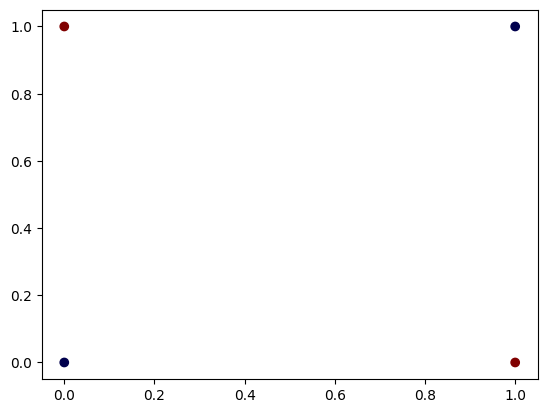

In [42]:
# Original points in XOR
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)
plt.scatter(X[:,0],X[:,1], c=y, cmap='seismic') #plot the x and y of each point in X. Color coresponds with the y value(label): 0 or 1 (not to be confused with the x and y in the graph)


Now let's generate some more points around each of the 4 points

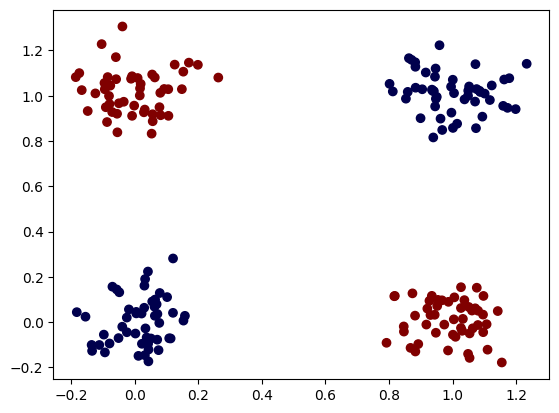

In [43]:
num_points_per_cluster = 50

# Noise to add around each point
noise_scale = 0.1

#Expand both lists to be: num_points_per_cluster * 4
X = X.repeat(num_points_per_cluster, 1)
y = y.repeat(num_points_per_cluster, 1)

# Now lets add the noise to each point
noise = torch.randn(X.shape) * noise_scale #creates an array of random noise values with the same size as the X matrix
X = X + noise #add the noise to each point


plt.scatter(X[:,0],X[:,1], c=y, cmap='seismic')

Now its time to Train!!

In [44]:
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    pred, _ = net(X)
    loss = criterion(pred, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [1000/10000], Loss: 0.5000
Epoch [2000/10000], Loss: 0.5000
Epoch [3000/10000], Loss: 0.5000
Epoch [4000/10000], Loss: 0.5000
Epoch [5000/10000], Loss: 0.5000
Epoch [6000/10000], Loss: 0.5000
Epoch [7000/10000], Loss: 0.5000
Epoch [8000/10000], Loss: 0.5000
Epoch [9000/10000], Loss: 0.5000
Epoch [10000/10000], Loss: 0.5000


MORE WORK BELLOW

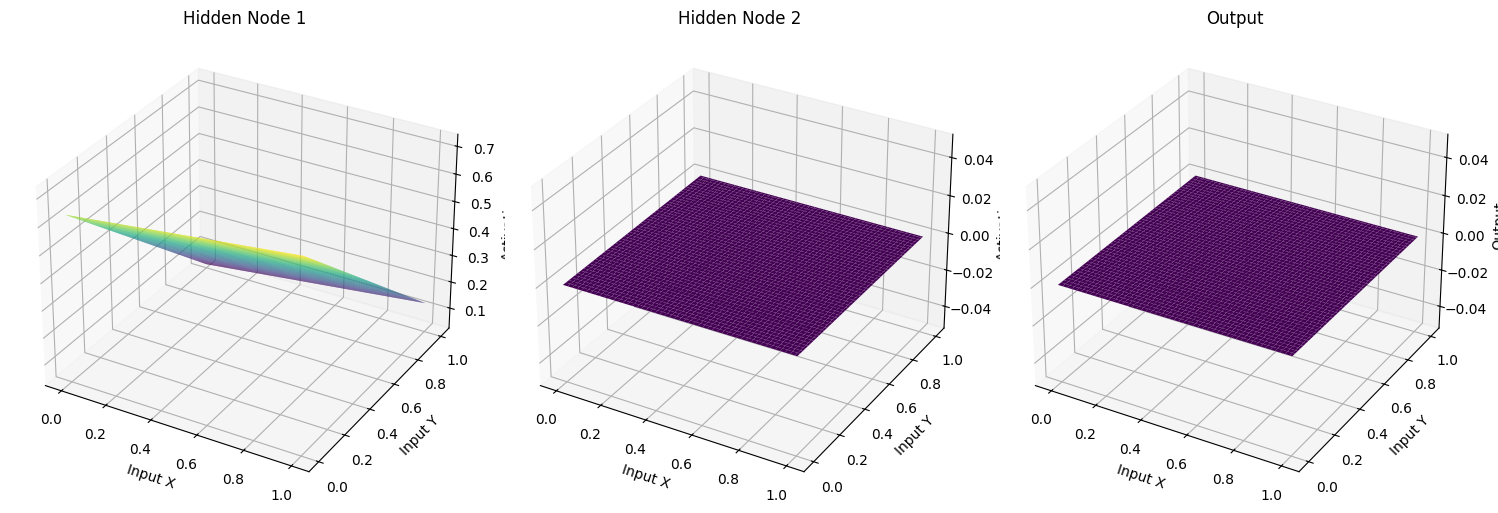

Final outputs:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 

In [45]:

# Generate a grid of points for visualization
x = torch.linspace(0, 1, 100)
y = torch.linspace(0, 1, 100)
x_grid, y_grid = torch.meshgrid(x, y)
xy_grid = torch.stack((x_grid.flatten(), y_grid.flatten()), dim=1)

# Get the output and hidden layer activations
with torch.no_grad():
    output, hidden = net(xy_grid)

# Reshape the results
output = output.reshape(100, 100)
hidden1 = hidden[:, 0].reshape(100, 100)
hidden2 = hidden[:, 1].reshape(100, 100)

# Plotting
fig = plt.figure(figsize=(15, 5))

# Plot for the first hidden node
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(x_grid.numpy(), y_grid.numpy(), hidden1.numpy(), cmap='viridis')
ax1.set_title('Hidden Node 1')
ax1.set_xlabel('Input X')
ax1.set_ylabel('Input Y')
ax1.set_zlabel('Activation')

# Plot for the second hidden node
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(x_grid.numpy(), y_grid.numpy(), hidden2.numpy(), cmap='viridis')
ax2.set_title('Hidden Node 2')
ax2.set_xlabel('Input X')
ax2.set_ylabel('Input Y')
ax2.set_zlabel('Activation')

# Plot for the output
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(x_grid.numpy(), y_grid.numpy(), output.numpy(), cmap='viridis')
ax3.set_title('Output')
ax3.set_xlabel('Input X')
ax3.set_ylabel('Input Y')
ax3.set_zlabel('Output')

plt.tight_layout()
plt.show()

# Print the final output for the XOR inputs
print("Final outputs:")
print(net(X)[0].detach().numpy())

Epoch [1000/10000], Loss: 0.2500
Epoch [2000/10000], Loss: 0.2500
Epoch [3000/10000], Loss: 0.2500
Epoch [4000/10000], Loss: 0.2500
Epoch [5000/10000], Loss: 0.2500
Epoch [6000/10000], Loss: 0.2500
Epoch [7000/10000], Loss: 0.2500
Epoch [8000/10000], Loss: 0.2500
Epoch [9000/10000], Loss: 0.2500
Epoch [10000/10000], Loss: 0.2499


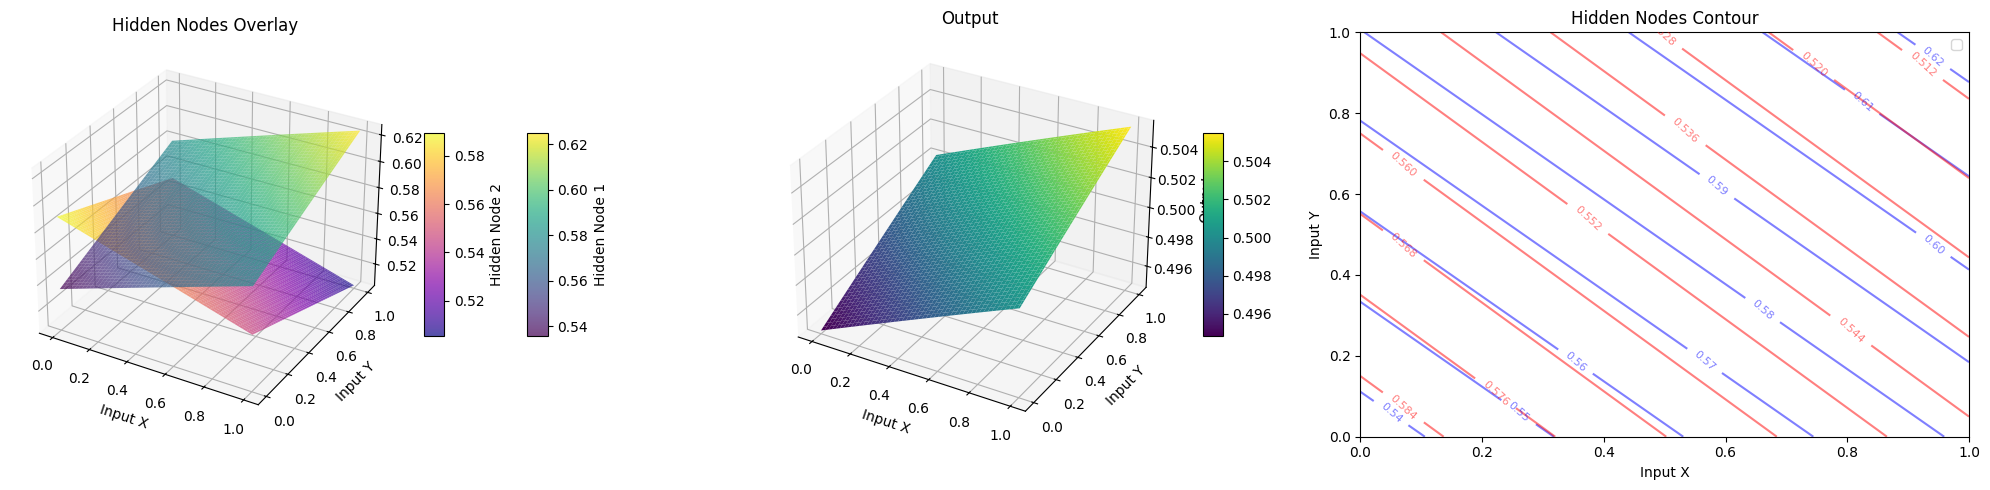

Final outputs:
[[0.49475297]
 [0.5002012 ]
 [0.5003476 ]
 [0.50550956]]


In [46]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the neural network
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h = self.sigmoid(self.hidden(x))
        o = self.sigmoid(self.output(h))
        return o, h

# Create the network and define loss function and optimizer
net = XORNet()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

# XOR input and output
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)

# Training loop
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    output, _ = net(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Generate a grid of points for visualization
x = torch.linspace(0, 1, 100)
y = torch.linspace(0, 1, 100)
x_grid, y_grid = torch.meshgrid(x, y)
xy_grid = torch.stack((x_grid.flatten(), y_grid.flatten()), dim=1)

# Get the output and hidden layer activations
with torch.no_grad():
    output, hidden = net(xy_grid)

# Reshape the results
output = output.reshape(100, 100)
hidden1 = hidden[:, 0].reshape(100, 100)
hidden2 = hidden[:, 1].reshape(100, 100)

# Plotting
fig = plt.figure(figsize=(20, 5))

# Plot for the overlaid hidden nodes
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(x_grid.numpy(), y_grid.numpy(), hidden1.numpy(), cmap='viridis', alpha=0.7)
surf2 = ax1.plot_surface(x_grid.numpy(), y_grid.numpy(), hidden2.numpy(), cmap='plasma', alpha=0.7)
ax1.set_title('Hidden Nodes Overlay')
ax1.set_xlabel('Input X')
ax1.set_ylabel('Input Y')
ax1.set_zlabel('Activation')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10, label='Hidden Node 1')
fig.colorbar(surf2, ax=ax1, shrink=0.5, aspect=10, label='Hidden Node 2')

# Plot for the output
ax2 = fig.add_subplot(132, projection='3d')
surf_out = ax2.plot_surface(x_grid.numpy(), y_grid.numpy(), output.numpy(), cmap='viridis')
ax2.set_title('Output')
ax2.set_xlabel('Input X')
ax2.set_ylabel('Input Y')
ax2.set_zlabel('Output')
fig.colorbar(surf_out, ax=ax2, shrink=0.5, aspect=10)

# 2D contour plot for hidden nodes
ax3 = fig.add_subplot(133)
contour1 = ax3.contour(x_grid.numpy(), y_grid.numpy(), hidden1.numpy(), levels=10, colors='blue', alpha=0.5)
contour2 = ax3.contour(x_grid.numpy(), y_grid.numpy(), hidden2.numpy(), levels=10, colors='red', alpha=0.5)
ax3.clabel(contour1, inline=True, fontsize=8, colors='blue')
ax3.clabel(contour2, inline=True, fontsize=8, colors='red')
ax3.set_title('Hidden Nodes Contour')
ax3.set_xlabel('Input X')
ax3.set_ylabel('Input Y')
ax3.legend(['Hidden Node 1', 'Hidden Node 2'])

plt.tight_layout()
plt.show()

# Print the final output for the XOR inputs
print("Final outputs:")
print(net(X)[0].detach().numpy())

In [47]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the neural network
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h = self.sigmoid(self.hidden(x))
        o = self.sigmoid(self.output(h))
        return o, h

# Create the network and define loss function and optimizer
net = XORNet()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

# XOR input and output
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)

# Training loop
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    output, _ = net(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Generate a grid of points for visualization
x = torch.linspace(0, 1, 100)
y = torch.linspace(0, 1, 100)
x_grid, y_grid = torch.meshgrid(x, y)
xy_grid = torch.stack((x_grid.flatten(), y_grid.flatten()), dim=1)

# Get the output and hidden layer activations
with torch.no_grad():
    output, hidden = net(xy_grid)
    xor_output, xor_hidden = net(X)

# Reshape the results
output = output.reshape(100, 100)
hidden1 = hidden[:, 0].reshape(100, 100)
hidden2 = hidden[:, 1].reshape(100, 100)


Epoch [1000/10000], Loss: 0.2499
Epoch [2000/10000], Loss: 0.2498
Epoch [3000/10000], Loss: 0.2495


KeyboardInterrupt: 

In [ ]:

# Plotting
fig = plt.figure(figsize=(20, 5))

# Plot for the overlaid hidden nodes
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(x_grid.numpy(), y_grid.numpy(), hidden1.numpy(), cmap='viridis', alpha=0.7)
surf2 = ax1.plot_surface(x_grid.numpy(), y_grid.numpy(), hidden2.numpy(), cmap='plasma', alpha=0.7)
ax1.set_title('Hidden Nodes Overlay')
ax1.set_xlabel('Input X')
ax1.set_ylabel('Input Y')
ax1.set_zlabel('Activation')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10, label='Hidden Node 1')
fig.colorbar(surf2, ax=ax1, shrink=0.5, aspect=10, label='Hidden Node 2')

# Add XOR points to 3D plot
for i in range(4):
    ax1.scatter(X[i, 0].item(), X[i, 1].item(), xor_hidden[i, 0].item(), color='red', s=50, label=f'({X[i, 0].item()}, {X[i, 1].item()})' if i == 0 else "")
    ax1.scatter(X[i, 0].item(), X[i, 1].item(), xor_hidden[i, 1].item(), color='green', s=50)
ax1.legend()

# Plot for the output
ax2 = fig.add_subplot(132, projection='3d')
surf_out = ax2.plot_surface(x_grid.numpy(), y_grid.numpy(), output.numpy(), cmap='viridis')
ax2.set_title('Output')
ax2.set_xlabel('Input X')
ax2.set_ylabel('Input Y')
ax2.set_zlabel('Output')
fig.colorbar(surf_out, ax=ax2, shrink=0.5, aspect=10)

# 2D contour plot for hidden nodes
ax3 = fig.add_subplot(133)
contour1 = ax3.contour(x_grid.numpy(), y_grid.numpy(), hidden1.numpy(), levels=10, colors='blue', alpha=0.5)
contour2 = ax3.contour(x_grid.numpy(), y_grid.numpy(), hidden2.numpy(), levels=10, colors='red', alpha=0.5)
ax3.clabel(contour1, inline=True, fontsize=8, colors='blue')
ax3.clabel(contour2, inline=True, fontsize=8, colors='red')
ax3.set_title('Hidden Nodes Contour')
ax3.set_xlabel('Input X')
ax3.set_ylabel('Input Y')

# Add XOR points to 2D contour plot
ax3.scatter(X[:, 0], X[:, 1], color='green', s=50)
for i in range(4):
    ax3.annotate(f'({X[i, 0].item()}, {X[i, 1].item()})', (X[i, 0].item(), X[i, 1].item()), xytext=(5, 5), textcoords='offset points')

ax3.legend(['Hidden Node 1', 'Hidden Node 2', 'XOR Points'])

plt.tight_layout()
plt.show()

# Print the final output for the XOR inputs
print("Final outputs:")
print(net(X)[0].detach().numpy())